In [6]:
from gmr.gmr.gmm import GMM, plot_error_ellipses
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


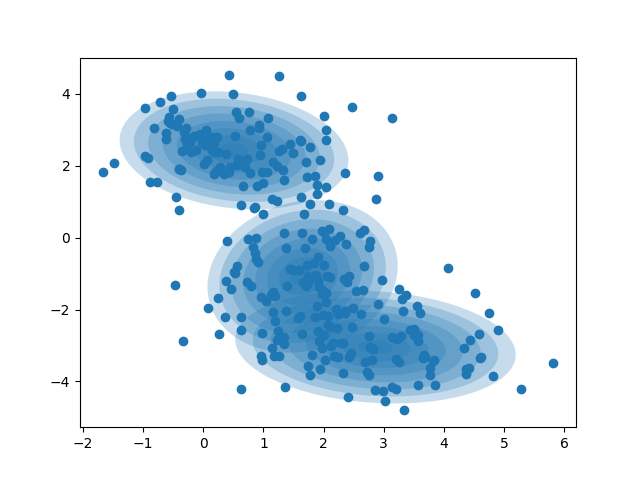

In [11]:
#prepare some data
n = 100
k = 3
locs = [np.random.rand(2) * 6 - 3 for i in range(k)]
alpha = [np.random.rand() * 2*np.pi for i in range(k)]
scale = [(np.random.rand()+.5, np.random.rand()+.5) for i in range(k)]
trans = [np.array([[l1*np.cos(a), -np.sin(a)], [np.sin(a), l2*np.cos(a)]]) for (l1, l2), a in zip(scale, alpha)]
data = np.vstack([np.random.randn(n, 2).dot(t.T)+loc for loc, t in zip(locs, trans)])

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:,0], data[:,1])



In [12]:
gmm = GMM(n_components=k, covariance_type='full')
gmm.fit(data)

plot_error_ellipses(ax, gmm)

In [10]:
#test save and load
gmm.save_model('test_gmm')
new_gmm = GMM(n_components=k)
new_gmm.load_model('test_gmm.npy')

Model saved to test_gmm


<IPython.core.display.Javascript object>


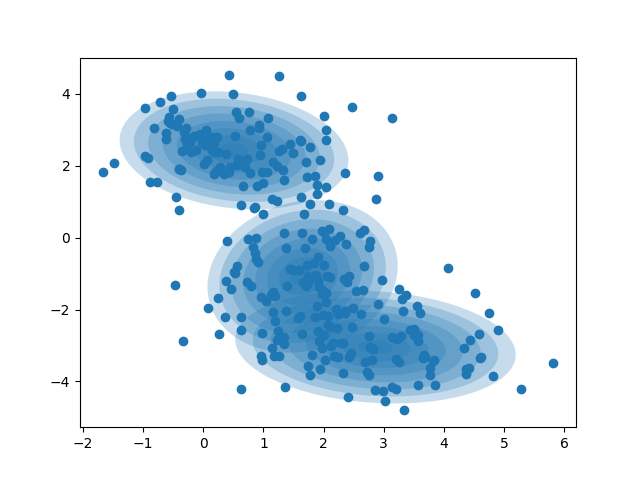

In [13]:
%matplotlib notebook
fig = plt.figure()
ax_new = fig.add_subplot(111)
ax_new.scatter(data[:,0], data[:,1])

plot_error_ellipses(ax_new, gmm)